In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from statsmodels.tsa.stattools import acf, ccf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import utils
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
import pandas as pd
from statsmodels.graphics.api import qqplot
import os
import pmdarima as pm
from sklearn.metrics import mean_squared_error

In [17]:
dir_path = "C:\\Users\\weber\\Documents\\Project-1018"

In [18]:
data = pd.read_csv(os.path.join(dir_path,'importdata','HOURLY_LOAD-202208.csv'))

In [19]:
# Basic Preprocessing
data.columns = data.columns.str.replace(' ','')

In [20]:
# No missing vals
data.isnull().sum()

MarketHour    0
CSWS          0
EDE           0
GRDA          0
INDN          0
KACY          0
KCPL          0
LES           0
MPS           0
NPPD          0
OKGE          0
OPPD          0
SECI          0
SPRM          0
SPS           0
WAUE          0
WFEC          0
WR            0
dtype: int64

In [21]:
data.columns

Index(['MarketHour', 'CSWS', 'EDE', 'GRDA', 'INDN', 'KACY', 'KCPL', 'LES',
       'MPS', 'NPPD', 'OKGE', 'OPPD', 'SECI', 'SPRM', 'SPS', 'WAUE', 'WFEC',
       'WR'],
      dtype='object')

(array([ 87., 117., 106.,  86.,  82.,  77.,  76.,  60.,  29.,  24.]),
 array([ 4548.997 ,  5095.0504,  5641.1038,  6187.1572,  6733.2106,
         7279.264 ,  7825.3174,  8371.3708,  8917.4242,  9463.4776,
        10009.531 ]),
 <BarContainer object of 10 artists>)

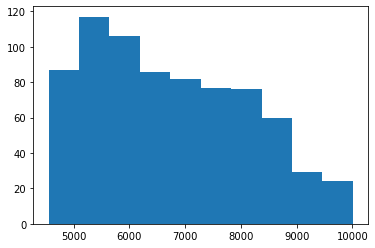

In [22]:
plt.hist(data['CSWS'])

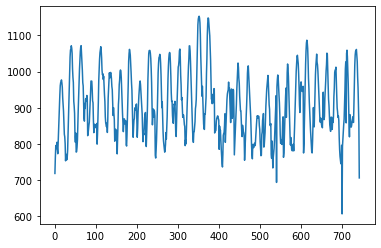

In [23]:
plt.plot(data['GRDA'])

In [24]:
csws = data['CSWS']

In [25]:
csws.shape

(744,)

In [27]:
idx = int(0.8*csws.shape[0])
train = csws[:idx]
test = csws[idx:]

In [29]:

auto_arima = pm.auto_arima(train, stepwise=False, seasonal=True)
auto_arima

ARIMA(order=(2, 1, 3), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [30]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  595
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -3342.896
Date:                Thu, 24 Nov 2022   AIC                           6699.792
Time:                        01:15:50   BIC                           6730.500
Sample:                             0   HQIC                          6711.751
                                - 595                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0747      0.254     -0.294      0.769      -0.573       0.424
ar.L1          1.9261      0.004    535.624      0.000       1.919       1.933
ar.L2         -0.9941      0.003   -312.821      0.000      -1.000      -0.988
ma.L1         -1.0698      0.039    -27.310      0.000      -1.147      -0.993
ma.L2         -0.2730      0.059     -4.597      0.000      -0.389      -0.157
ma.L3          0.4281      0.035     12.071      0.000       0.359       0.498
sigma2      4418.1287    223.253     19.790      0.000    3980.562    4855.696
===================================================================================
Ljung-Box (L1) (Q):                   3.65   Jarque-Bera (JB):                19.14
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                            -0.01
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

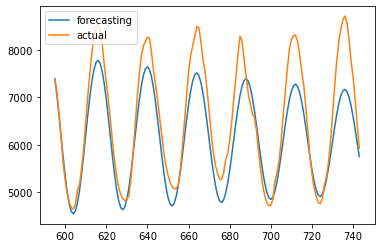

In [35]:
pred = auto_arima.predict(n_periods=len(test))
plt.plot(pred, label = "forecasting")
plt.legend()
plt.plot(test,label = "actual")
plt.legend()

In [39]:
rms = mean_squared_error(test, pred, squared=False)
rms

589.0401936743076

### Train every column with Auto_arima and Evaluate the Result by Rmse

In [51]:
def estimator(train):
    auto_arima = pm.auto_arima(train, stepwise=False, seasonal=True)
    return auto_arima

def predictor(model,test):
    pred = model.predict(n_periods=len(test))
    return pred

In [65]:
def harness(data):
    scores = []
    counter = 0
    for col in data.columns[1:]:
        print(f"{counter/len(data.columns[1:])} finished")
        counter += 1
        idx = int(0.8*data[col].shape[0])
        train = data[col][:idx]
        test = data[col][idx:]
        model = estimator(train)
        pred = predictor(model,test)
        rms = mean_squared_error(test, pred, squared=False)
        scores.append(rms)
    scores = np.array(scores)
    avg_score = np.mean(scores)
    return avg_score,scores

In [66]:
data.columns

Index(['MarketHour', 'CSWS', 'EDE', 'GRDA', 'INDN', 'KACY', 'KCPL', 'LES',
       'MPS', 'NPPD', 'OKGE', 'OPPD', 'SECI', 'SPRM', 'SPS', 'WAUE', 'WFEC',
       'WR'],
      dtype='object')

In [67]:
avg_score,scores = harness(data)

0.0 finished
0.058823529411764705 finished
0.11764705882352941 finished
0.17647058823529413 finished
0.23529411764705882 finished
0.29411764705882354 finished
0.35294117647058826 finished
0.4117647058823529 finished
0.47058823529411764 finished
0.5294117647058824 finished
0.5882352941176471 finished
0.6470588235294118 finished
0.7058823529411765 finished
0.7647058823529411 finished
0.8235294117647058 finished
0.8823529411764706 finished
0.9411764705882353 finished


In [68]:
avg_score

169.25591086700706

In [70]:
scores

array([589.04019367,  82.85167145,  88.32763631,  23.05109552,
        24.11761808, 206.85684052,  57.79230773, 111.85475067,
       329.57340121, 338.53823024, 162.8594808 ,  38.13105021,
        53.75519411, 181.03897123, 207.8910058 ,  72.52605962,
       309.14497756])

### Kalman Filter

In [91]:
csws = data['CSWS']
idx = int(0.8*csws.shape[0])
train = csws[:idx]
test = csws[idx:]

In [92]:
data.columns

Index(['CSWS', 'EDE', 'GRDA', 'INDN', 'KACY', 'KCPL', 'LES', 'MPS', 'NPPD',
       'OKGE', 'OPPD', 'SECI', 'SPRM', 'SPS', 'WAUE', 'WFEC', 'WR'],
      dtype='object')

In [82]:
data = data.drop('MarketHour',axis = 1)

In [94]:
from pykalman import KalmanFilter
kf = KalmanFilter(n_dim_state=1, n_dim_obs=1)


In [95]:
kf.em(csws, n_iter=6)

In [100]:
f_means, f_covariances = kf.filter(csws)
s_means, s_covariances = kf.smooth(csws)

In [106]:
train

<class 'pandas.core.series.Series'>


In [107]:
next_mean, next_covariance = kf.filter_update(
   f_means[-1], covariances[-1], train.iloc[-1]
)

In [127]:
idx = int(0.8*csws.shape[0])
f_means, f_covariances = kf.filter(csws[:idx])
pred = []
for i in range(idx,csws.shape[0]):
    next_mean, next_covariance = kf.filter_update(
    f_means[-1], f_covariances[-1], csws.iloc[i]
        )
    np.append(f_means,[next_mean])

    np.append(f_covariances,[next_covariance])
    pred.append(f_means[-1])
# print(pred)
    

In [128]:
test = csws[idx:]
np.array(pred).shape

(149, 1)

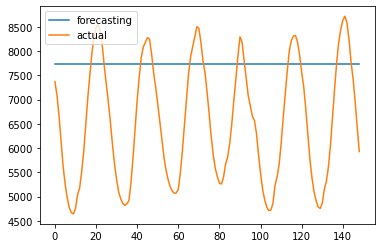

In [136]:
test = csws[idx:].reset_index(drop = True)
plt.plot(pred, label = "forecasting")
plt.legend()
plt.plot(test,label = "actual")
plt.legend()